In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Lottery/Train.csv')

# Display basic information about the dataset
print("Dataset Shape:", train_df.shape)
print("\nFirst 5 rows:")
display(train_df.head())

Dataset Shape: (31, 13)

First 5 rows:


,DATE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,265900,177570,889140,202833,******,915949,554372,128212,267803,115043,619722,506035
1,2,823141,737744,886529,161209,168524,235952,252192,377253,315068,******,133089,334811
2,3,358882,525224,750171,506256,970249,833495,236912,254528,848007,376453,507742,723784
3,4,107873,350822,506100,392107,904183,519665,194682,622939,298935,506852,281146,325526
4,5,177277,586971,959785,994936,499424,472138,501811,724506,649722,790019,770782,829065


In [4]:
train_df = train_df.replace('******', 0)
train_df = train_df.apply(pd.to_numeric)
train_df.head()

,DATE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,265900,177570,889140,202833,0,915949,554372,128212,267803,115043,619722,506035
1,2,823141,737744,886529,161209,168524,235952,252192,377253,315068,0,133089,334811
2,3,358882,525224,750171,506256,970249,833495,236912,254528,848007,376453,507742,723784
3,4,107873,350822,506100,392107,904183,519665,194682,622939,298935,506852,281146,325526
4,5,177277,586971,959785,994936,499424,472138,501811,724506,649722,790019,770782,829065


In [5]:
# Reshape the data from wide to long format
cleaned_df = train_df.melt(id_vars=['DATE'],
                           var_name='MONTH',
                           value_name='NUMBER')

# Create a proper date column using a safer method
def create_date(row):
    # Use the first day of each month with year 2024
    return pd.to_datetime(f"2024-{row['MONTH']}-{int(row['DATE'])}", errors='coerce')

cleaned_df['DATE'] = cleaned_df.apply(create_date, axis=1)

# Drop any rows with invalid dates (if any)
cleaned_df = cleaned_df.dropna(subset=['DATE'])

# Select only the relevant columns
cleaned_df = cleaned_df[['DATE', 'NUMBER']]

# Sort by date
cleaned_df = cleaned_df.sort_values('DATE').reset_index(drop=True)


In [6]:
cleaned_df.head(124)

,DATE,NUMBER
0,2024-01-01,265900
1,2024-01-02,823141
2,2024-01-03,358882
3,2024-01-04,107873
4,2024-01-05,177277
...,...,...
119,2024-04-29,479772
120,2024-04-30,720388
121,2024-05-01,0
122,2024-05-02,168524


In [7]:
def split_digits(number):
    return [int(d) for d in str(number).zfill(6)]

# Function to categorize digits
def categorize_digit(digit):
    if digit == 0:
        return 'zero'
    return 'even' if digit % 2 == 0 else 'odd'

# Create new columns for individual digits
digit_columns = ['digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6']
cleaned_df[digit_columns] = cleaned_df['NUMBER'].apply(
    lambda x: pd.Series(split_digits(x))
)

# Create categorical columns for each digit
for i, col in enumerate(digit_columns, start=1):
    cleaned_df[f'cat_{i}'] = cleaned_df[col].apply(categorize_digit)

In [8]:
cleaned_df.head()

,DATE,NUMBER,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
0,2024-01-01,265900,2,6,5,9,0,0,even,even,odd,odd,zero,zero
1,2024-01-02,823141,8,2,3,1,4,1,even,even,odd,odd,even,odd
2,2024-01-03,358882,3,5,8,8,8,2,odd,odd,even,even,even,even
3,2024-01-04,107873,1,0,7,8,7,3,odd,zero,odd,even,odd,odd
4,2024-01-05,177277,1,7,7,2,7,7,odd,odd,odd,even,odd,odd


In [9]:
cleaned_df.to_csv('cleaned_data_train.csv', index=False)

# Start EDA

## Basic Information

In [10]:
print("Dataset Info:")
cleaned_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     366 non-null    datetime64[ns]
 1   NUMBER   366 non-null    int64         
 2   digit_1  366 non-null    int64         
 3   digit_2  366 non-null    int64         
 4   digit_3  366 non-null    int64         
 5   digit_4  366 non-null    int64         
 6   digit_5  366 non-null    int64         
 7   digit_6  366 non-null    int64         
 8   cat_1    366 non-null    object        
 9   cat_2    366 non-null    object        
 10  cat_3    366 non-null    object        
 11  cat_4    366 non-null    object        
 12  cat_5    366 non-null    object        
 13  cat_6    366 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 40.2+ KB


In [11]:
print("\nDescriptive Statistics:")
display(cleaned_df.describe())


Descriptive Statistics:


,DATE,NUMBER,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2024-07-01 12:00:00.000000256,515188.191257,4.674863,4.229508,4.915301,4.426230,4.439891,4.448087
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-04-01 06:00:00,297470.750000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,2024-07-01 12:00:00,506047.500000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
75%,2024-09-30 18:00:00,737047.750000,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000
max,2024-12-31 00:00:00,999699.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
std,NaN,266551.202787,2.642285,2.966812,2.962031,2.962555,2.803216,2.880503


In [12]:
print("\nMissing Values:")
print(cleaned_df.isnull().sum())


Missing Values:
DATE       0
NUMBER     0
digit_1    0
digit_2    0
digit_3    0
digit_4    0
digit_5    0
digit_6    0
cat_1      0
cat_2      0
cat_3      0
cat_4      0
cat_5      0
cat_6      0
dtype: int64


## Digit Distribution


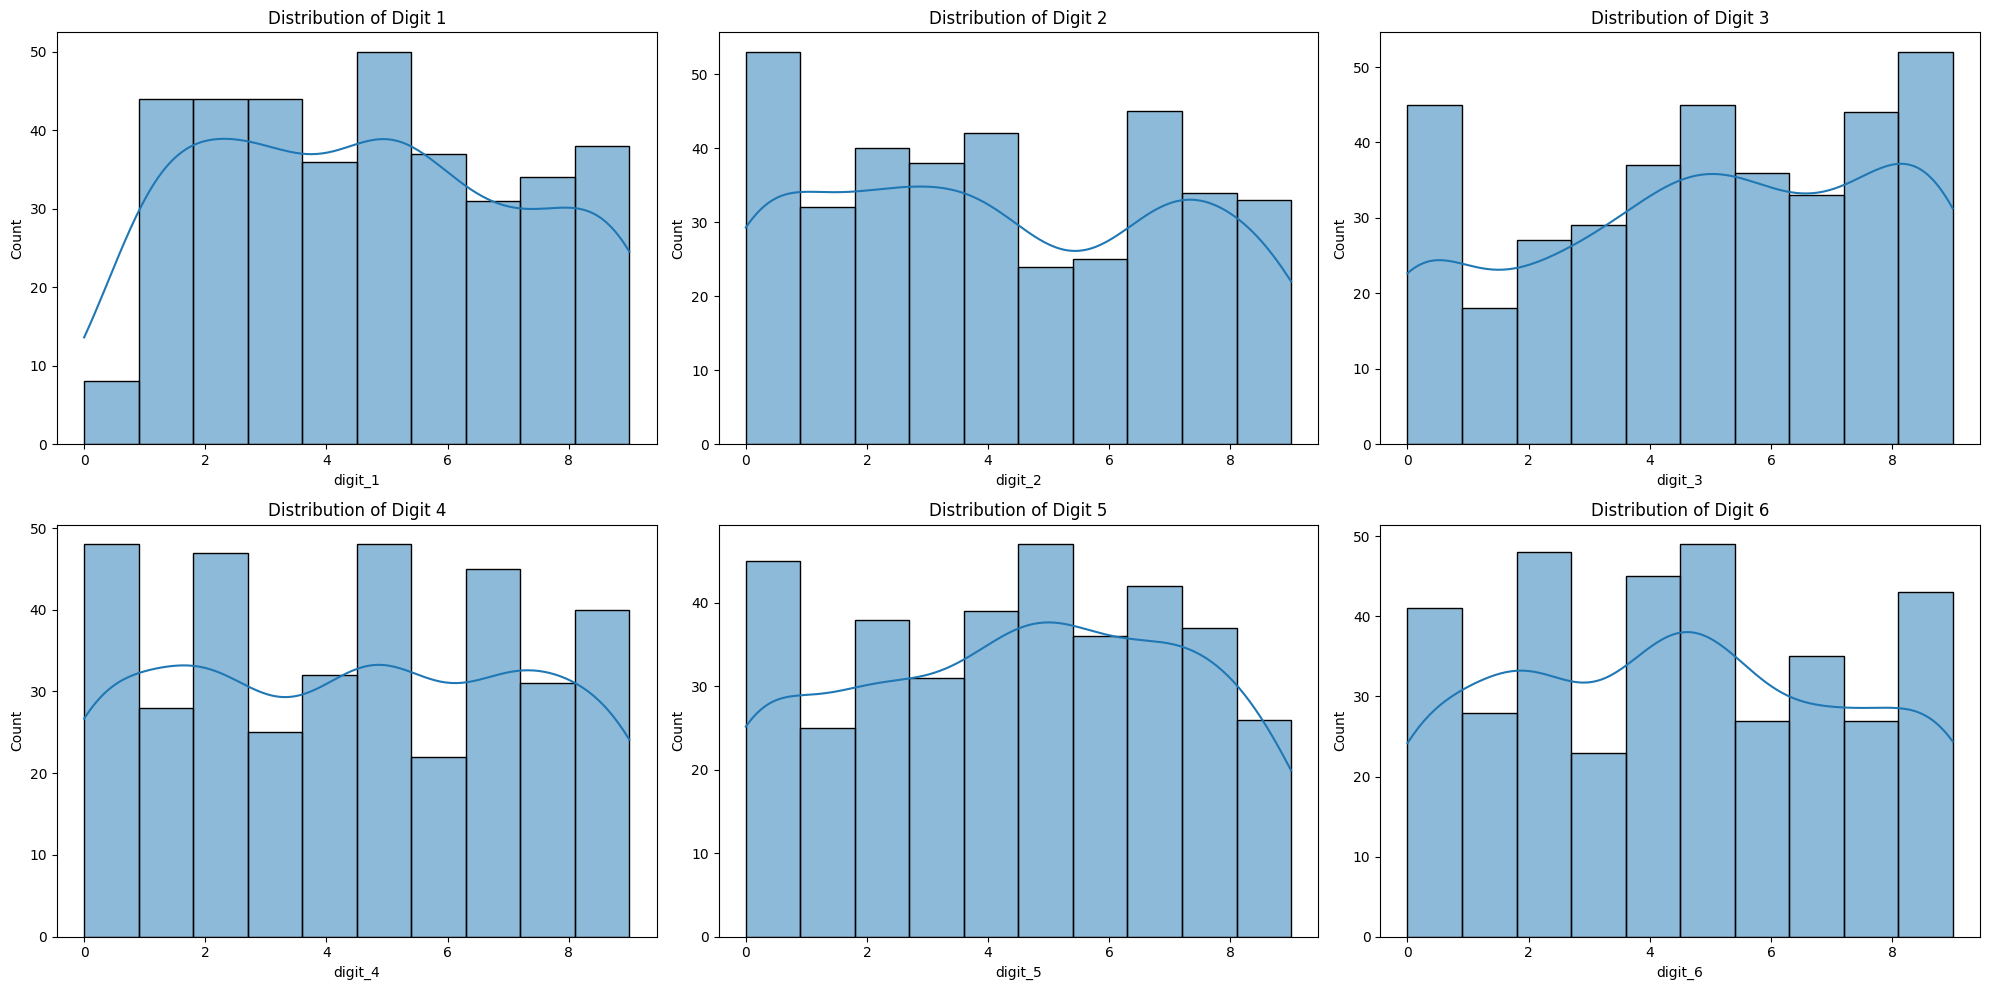

In [13]:
# Plot distribution of each digit
plt.figure(figsize=(20, 10))
for i, col in enumerate(digit_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_df[col], bins=10, kde=True)
    plt.title(f'Distribution of Digit {i}')
plt.tight_layout()
plt.show()

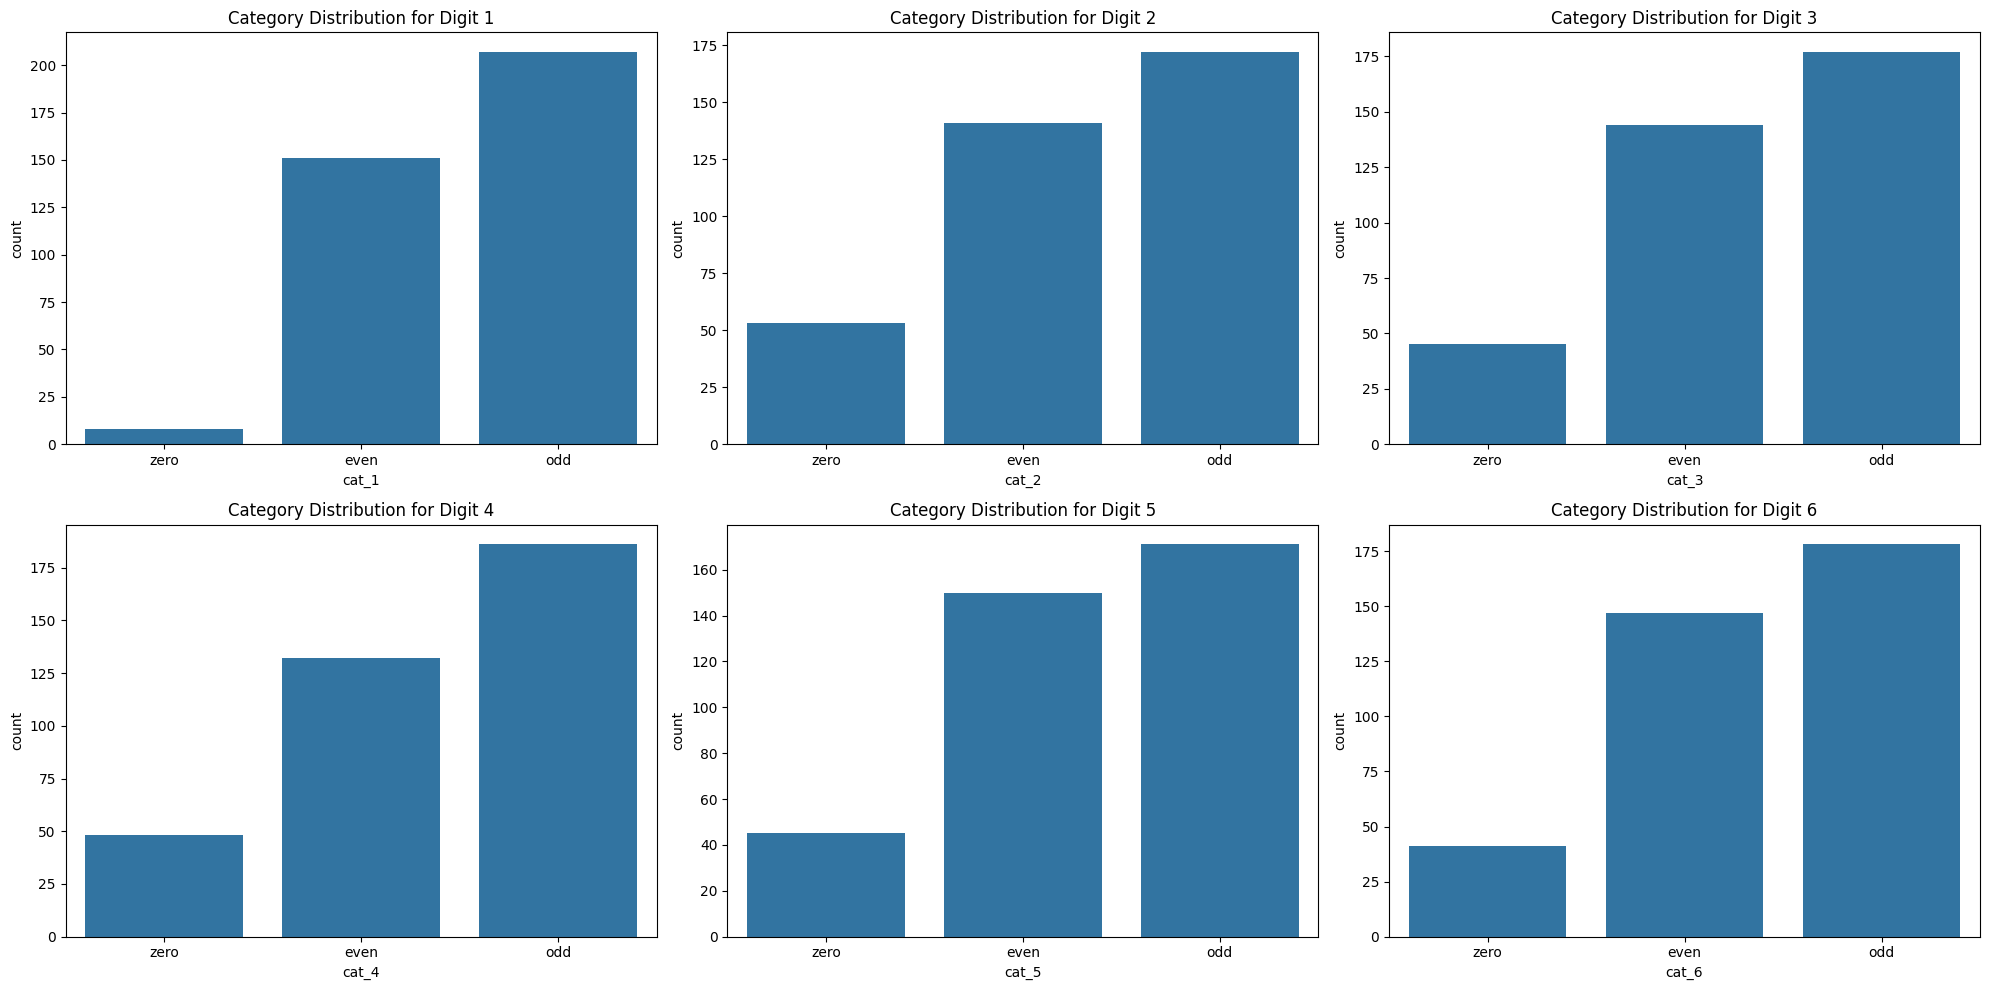

In [14]:
# Plot categorical distribution
plt.figure(figsize=(20, 10))
for i, col in enumerate([f'cat_{i}' for i in range(1, 7)], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=cleaned_df, order=['zero', 'even', 'odd'])
    plt.title(f'Category Distribution for Digit {i}')
plt.tight_layout()
plt.show()

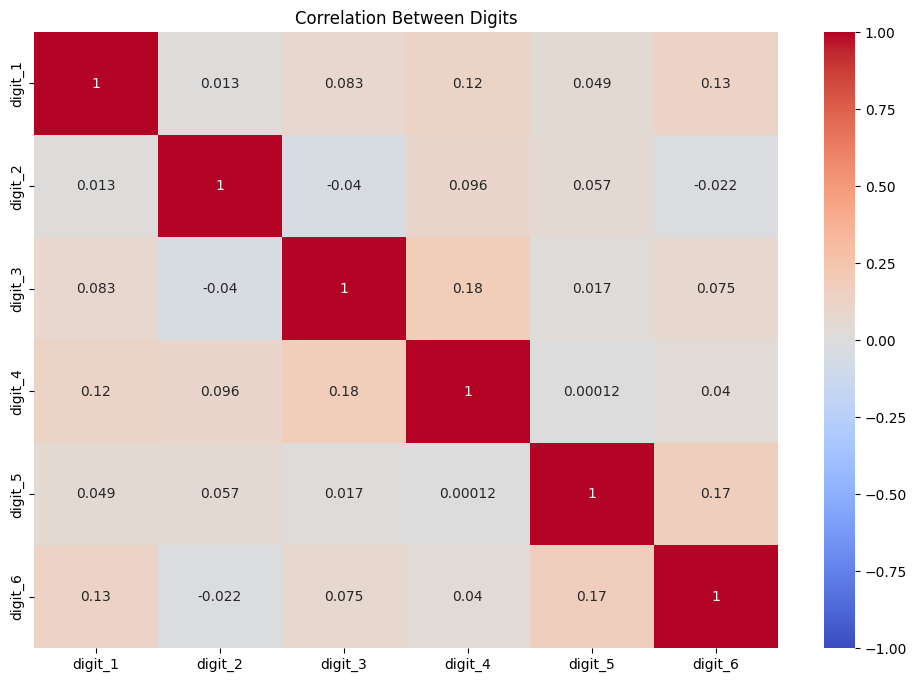

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = cleaned_df[digit_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Digits')
plt.show()

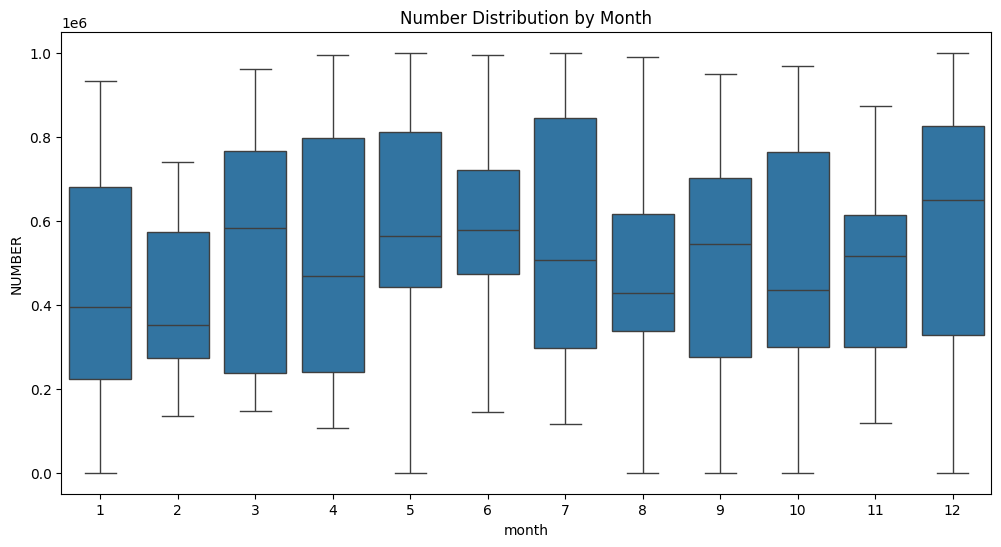

In [16]:
# Extract month and day
cleaned_df['month'] = cleaned_df['DATE'].dt.month
cleaned_df['day'] = cleaned_df['DATE'].dt.day

# Plot monthly patterns
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='NUMBER', data=cleaned_df)
plt.title('Number Distribution by Month')
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Chi-square test for independence between digits
for i in range(1, 7):
    for j in range(i+1, 7):
        contingency_table = pd.crosstab(cleaned_df[f'cat_{i}'], cleaned_df[f'cat_{j}'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test between digit {i} and {j}: p-value = {p:.4f}")

Chi-square test between digit 1 and 2: p-value = 0.0000
Chi-square test between digit 1 and 3: p-value = 0.0000
Chi-square test between digit 1 and 4: p-value = 0.0000
Chi-square test between digit 1 and 5: p-value = 0.0000
Chi-square test between digit 1 and 6: p-value = 0.0000
Chi-square test between digit 2 and 3: p-value = 0.5087
Chi-square test between digit 2 and 4: p-value = 0.0411
Chi-square test between digit 2 and 5: p-value = 0.0210
Chi-square test between digit 2 and 6: p-value = 0.0086
Chi-square test between digit 3 and 4: p-value = 0.1994
Chi-square test between digit 3 and 5: p-value = 0.0009
Chi-square test between digit 3 and 6: p-value = 0.0746
Chi-square test between digit 4 and 5: p-value = 0.0165
Chi-square test between digit 4 and 6: p-value = 0.0000
Chi-square test between digit 5 and 6: p-value = 0.0070


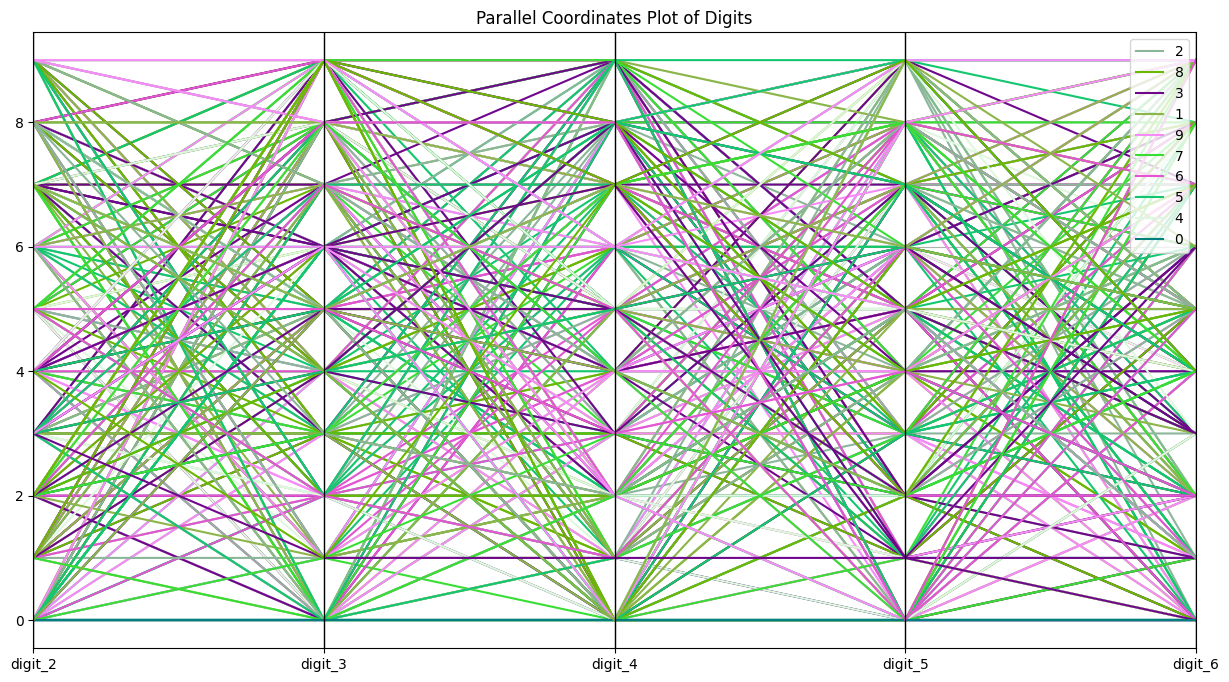

In [18]:
# Parallel coordinates plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(15, 8))
parallel_coordinates(cleaned_df[digit_columns], 'digit_1')
plt.title('Parallel Coordinates Plot of Digits')
plt.show()

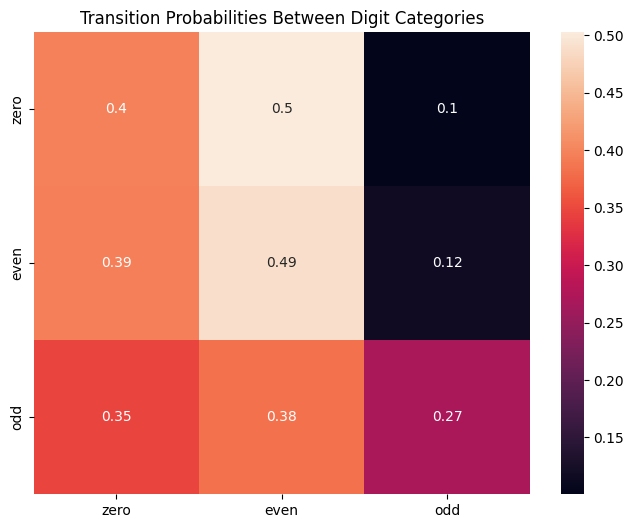

In [19]:
# Transition probabilities between digit categories
from sklearn.preprocessing import LabelEncoder

# Encode categories
le = LabelEncoder()
cat_cols = [f'cat_{i}' for i in range(1, 7)]
encoded_df = cleaned_df[cat_cols].apply(le.fit_transform)

# Transition matrix
transition_matrix = np.zeros((3, 3))
for i in range(5):  # Adjusted to avoid out-of-bounds access
    for j in range(len(cleaned_df)-1):
        current = encoded_df.iloc[j, i]
        next_val = encoded_df.iloc[j, i+1]
        transition_matrix[current, next_val] += 1

# Normalize and plot
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True,
            xticklabels=['zero', 'even', 'odd'],
            yticklabels=['zero', 'even', 'odd'])
plt.title('Transition Probabilities Between Digit Categories')
plt.show()

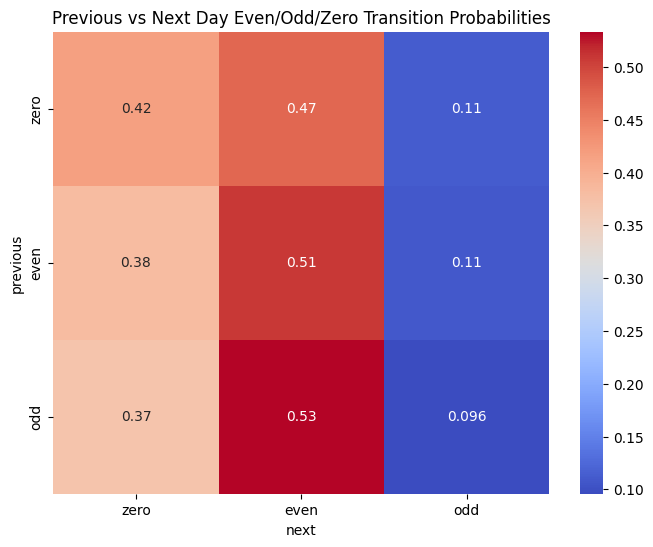

In [20]:
# Create a new DataFrame to store previous and next day categories
transition_df = pd.DataFrame({
    'previous': encoded_df.iloc[:-1, :].values.flatten(),
    'next': encoded_df.iloc[1:, :].values.flatten()
})

# Group by previous and next categories and count occurrences
transition_counts = transition_df.groupby(['previous', 'next']).size().unstack()

# Normalize and plot
transition_counts = transition_counts.div(transition_counts.sum(axis=1), axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(transition_counts, annot=True, cmap='coolwarm',
            xticklabels=['zero', 'even', 'odd'],
            yticklabels=['zero', 'even', 'odd'])
plt.title('Previous vs Next Day Even/Odd/Zero Transition Probabilities')
plt.show()

<ipython-input-21-49e499093d47>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=next_counts.index, y=next_counts.values, palette='viridis')


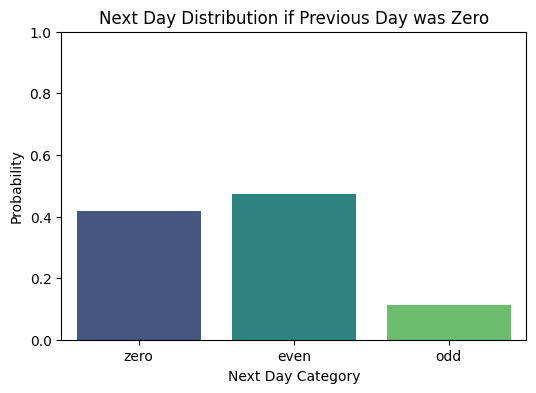

<ipython-input-21-49e499093d47>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=next_counts.index, y=next_counts.values, palette='viridis')


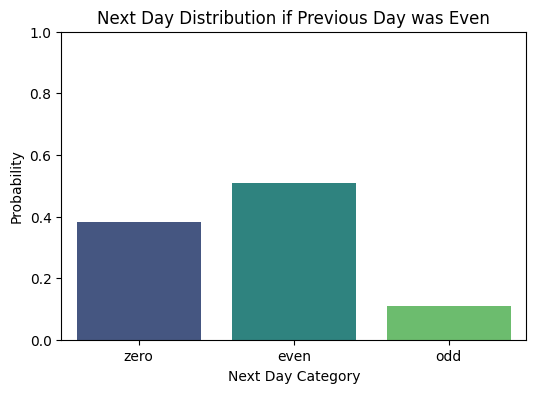

<ipython-input-21-49e499093d47>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=next_counts.index, y=next_counts.values, palette='viridis')


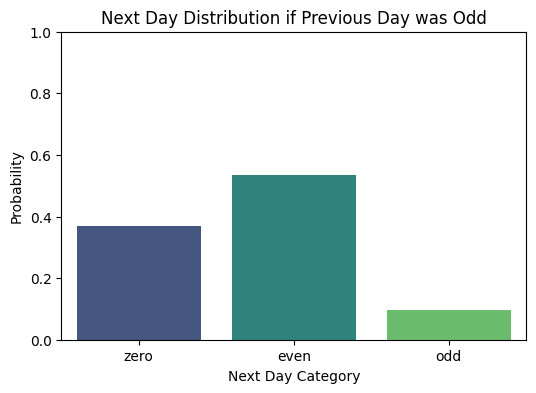

In [21]:
# Create a new DataFrame to store previous and next day categories
transition_data = []

# For each digit position (1-6)
for digit_pos in range(1, 7):
    # Get the current digit's categories
    current_digit = encoded_df.iloc[:-1, digit_pos-1]  # All but last day
    next_digit = encoded_df.iloc[1:, digit_pos-1]      # All but first day

    # Create transitions for this digit position
    for prev, next_val in zip(current_digit, next_digit):
        transition_data.append({
            'digit_position': digit_pos,
            'previous': prev,
            'next': next_val
        })

# Create DataFrame from transition data
transition_df = pd.DataFrame(transition_data)

# Map encoded values back to categories
category_map = {0: 'zero', 1: 'even', 2: 'odd'}
transition_df['previous'] = transition_df['previous'].map(category_map)
transition_df['next'] = transition_df['next'].map(category_map)

# Plot transition probabilities for each previous category
for prev_category in ['zero', 'even', 'odd']:
    # Filter transitions where previous day's category is the current one
    filtered_transitions = transition_df[transition_df['previous'] == prev_category]

    # Count occurrences of next day's categories
    next_counts = filtered_transitions['next'].value_counts(normalize=True)

    # Fill missing categories with 0 probability
    for cat in ['zero', 'even', 'odd']:
        if cat not in next_counts:
            next_counts[cat] = 0

    # Sort to maintain consistent order
    next_counts = next_counts.reindex(['zero', 'even', 'odd'])

    # Plot the distribution
    plt.figure(figsize=(6, 4))
    sns.barplot(x=next_counts.index, y=next_counts.values, palette='viridis')
    plt.title(f'Next Day Distribution if Previous Day was {prev_category.capitalize()}')
    plt.xlabel('Next Day Category')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Set y-axis limit to 0-1 for probability
    plt.show()

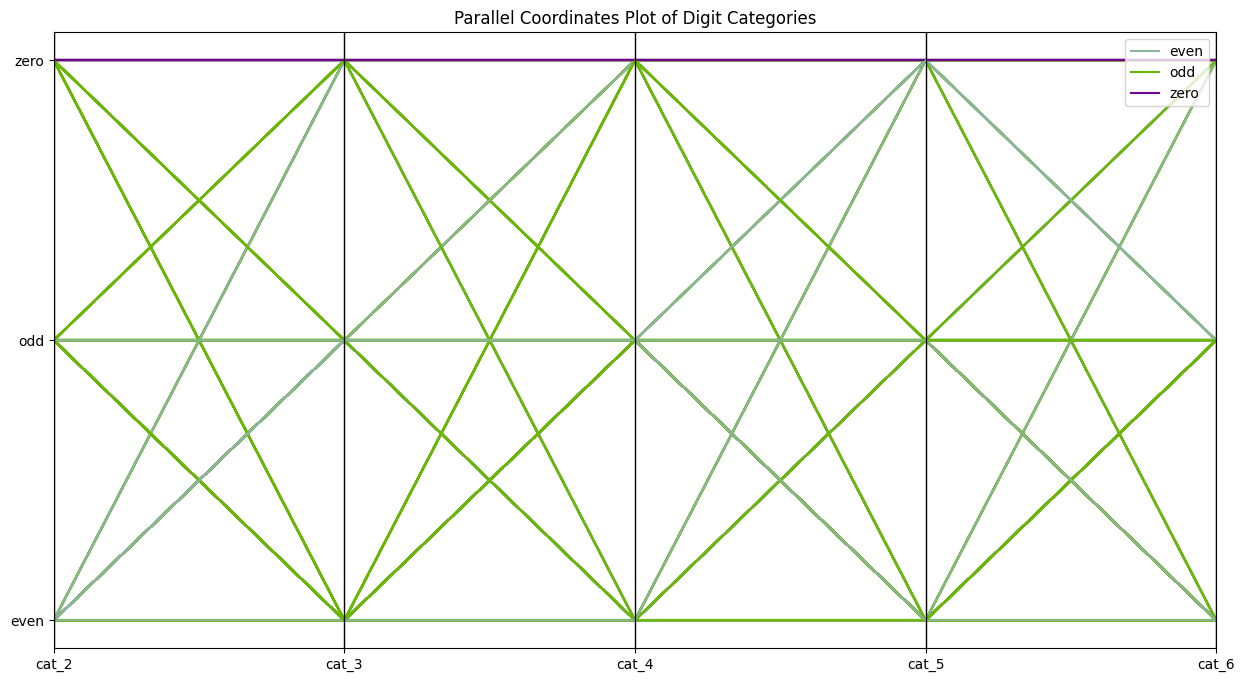

In [22]:
# Parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(cleaned_df[cat_cols], 'cat_1')
plt.title('Parallel Coordinates Plot of Digit Categories')
plt.show()

In [23]:
from scipy.stats import chi2_contingency

# Chi-square test for independence between categories
chi_square_results = []
for i in range(1, 7):
    for j in range(i+1, 7):
        contingency_table = pd.crosstab(cleaned_df[f'cat_{i}'], cleaned_df[f'cat_{j}'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results.append({
            'Digit 1': f'cat_{i}',
            'Digit 2': f'cat_{j}',
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

# Convert results to a DataFrame for better visualization
chi_square_df = pd.DataFrame(chi_square_results)
print("Chi-Square Test Results:")
display(chi_square_df)

Chi-Square Test Results:


,Digit 1,Digit 2,Chi-Square Statistic,p-value,Degrees of Freedom
0,cat_1,cat_2,49.039657,5.728641e-10,4
1,cat_1,cat_3,59.927982,3.003731e-12,4
2,cat_1,cat_4,56.686924,1.439137e-11,4
3,cat_1,cat_5,58.420033,6.228767e-12,4
4,cat_1,cat_6,66.457637,1.268526e-13,4
5,cat_2,cat_3,3.301617,5.086760e-01,4
6,cat_2,cat_4,9.961971,4.107317e-02,4
7,cat_2,cat_5,11.556942,2.096880e-02,4
8,cat_2,cat_6,13.617115,8.622871e-03,4
9,cat_3,cat_4,5.996075,1.994416e-01,4


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

def analyze_digit6_influence(cleaned_df):
    """
    Analyzes the influence of other digits and categories on 'digit_6' and 'cat_6'
    based on Chi-Square test results.

    Args:
      cleaned_df (pd.DataFrame): The input DataFrame containing the data.
    """

    # --- Chi-Square Tests ---
    # 1. Digits vs. Digit 6
    print("--- Digits influencing Digit 6 ---")
    for i in range(1, 6):
        contingency_table = pd.crosstab(cleaned_df[f'digit_{i}'], cleaned_df['digit_6'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Significance level
            print(f"Digit {i} (p={p:.3f})")
        else:
            print(f"Digit {i} (p={p:.3f}) - Not significant")


    # 2. Categories vs. Cat 6
    print("\n--- Categories influencing Cat 6 ---")
    for i in range(1, 6):
        contingency_table = pd.crosstab(cleaned_df[f'cat_{i}'], cleaned_df['cat_6'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Significance level
            print(f"Category {i} (p={p:.3f})")
        else:
            print(f"Category {i} (p={p:.3f}) - Not significant")

    # 3. Digits vs. Cat 6
    print("\n--- Digits influencing Cat 6 ---")
    for i in range(1, 6):
        contingency_table = pd.crosstab(cleaned_df[f'digit_{i}'], cleaned_df['cat_6'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Significance level
            print(f"Digit {i} (p={p:.3f})")
        else:
            print(f"Digit {i} (p={p:.3f}) - Not significant")

    # 4. Categories vs. Digit 6
    print("\n--- Categories influencing Digit 6 ---")
    for i in range(1, 6):
        contingency_table = pd.crosstab(cleaned_df[f'cat_{i}'], cleaned_df['digit_6'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Significance level
            print(f"Category {i} (p={p:.3f})")
        else:
            print(f"Category {i} (p={p:.3f}) - Not significant")

# Example usage (assuming your DataFrame is named 'cleaned_df'):
analyze_digit6_influence(cleaned_df)


--- Digits influencing Digit 6 ---
Digit 1 (p=0.000)
Digit 2 (p=0.254) - Not significant
Digit 3 (p=0.379) - Not significant
Digit 4 (p=0.032)
Digit 5 (p=0.001)

--- Categories influencing Cat 6 ---
Category 1 (p=0.000)
Category 2 (p=0.009)
Category 3 (p=0.075) - Not significant
Category 4 (p=0.000)
Category 5 (p=0.007)

--- Digits influencing Cat 6 ---
Digit 1 (p=0.000)
Digit 2 (p=0.027)
Digit 3 (p=0.322) - Not significant
Digit 4 (p=0.007)
Digit 5 (p=0.000)

--- Categories influencing Digit 6 ---
Category 1 (p=0.000)
Category 2 (p=0.128) - Not significant
Category 3 (p=0.217) - Not significant
Category 4 (p=0.008)
Category 5 (p=0.047)


In [25]:
import pandas as pd

def analyze_digit_patterns(cleaned_df):
    """
    Analyzes the patterns of digit 6 based on the values of digit 1, digit 4, and digit 5.

    Args:
      cleaned_df (pd.DataFrame): The input DataFrame containing the data.

    Returns:
      pd.DataFrame: A DataFrame summarizing the patterns of digit 6 based on digit 1, digit 4, and digit 5.
    """

    # Create a new column to classify digit_6 as 'odd', 'even', or 'zero'
    def classify_digit(digit):
        if digit == 0:
            return 'zero'
        elif digit % 2 == 0:
            return 'even'
        else:
            return 'odd'

    cleaned_df['digit_6_class'] = cleaned_df['digit_6'].apply(classify_digit)

    # Create a pivot table to summarize combinations of digit_1, digit_4, and digit_5
    pattern_summary = cleaned_df.groupby(['digit_1', 'digit_4', 'digit_5', 'digit_6_class']).size().unstack(fill_value=0)

    return pattern_summary

# Example usage (assuming your DataFrame is named 'cleaned_df'):
influence_df = analyze_digit_patterns(cleaned_df)

# Save the summary DataFrame to a CSV file
influence_df.to_csv('influence_of_1_4_5_in_6.csv', index=True)  # Set index=True to keep multi-index in CSV


In [26]:
import pandas as pd

def analyze_consecutive_patterns(df):
    """
    Analyzes consecutive patterns of 'digit_6' and 'cat_6' for even, odd, and zero.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'digit_6' and 'cat_6' columns.

    Returns:
        dict: A dictionary containing the analysis results for 'digit_6' and 'cat_6'.
    """

    results = {}

    for col in ['digit_6']:  # or ['digit_6', 'cat_6'] if you want to analyze both.  Adjust column names if needed

        # --- Consecutive Analysis ---
        consecutive_even = 0
        consecutive_odd = 0
        consecutive_zero = 0
        max_consecutive_even = 0
        max_consecutive_odd = 0
        max_consecutive_zero = 0

        for value in df[col]:
            if value == 0:
                consecutive_zero += 1
                consecutive_even = 0  # Reset others
                consecutive_odd = 0
            elif value % 2 == 0:
                consecutive_even += 1
                consecutive_odd = 0
                consecutive_zero = 0
            else:
                consecutive_odd += 1
                consecutive_even = 0
                consecutive_zero = 0

            max_consecutive_even = max(max_consecutive_even, consecutive_even)
            max_consecutive_odd = max(max_consecutive_odd, consecutive_odd)
            max_consecutive_zero = max(max_consecutive_zero, consecutive_zero)

        results[f'{col}_consecutive_even'] = max_consecutive_even
        results[f'{col}_consecutive_odd'] = max_consecutive_odd
        results[f'{col}_consecutive_zero'] = max_consecutive_zero

        # --- Maximum Days Without ---
        days_without_even = 0
        days_without_odd = 0
        days_without_zero = 0
        max_days_without_even = 0
        max_days_without_odd = 0
        max_days_without_zero = 0

        for value in df[col]:
            if value == 0:
                days_without_even += 1
                days_without_odd += 1
            elif value % 2 == 0:
                days_without_odd += 1
                days_without_zero += 1
                days_without_even = 0
            else:
                days_without_even += 1
                days_without_zero += 1
                days_without_odd = 0

            max_days_without_even = max(max_days_without_even, days_without_even)
            max_days_without_odd = max(max_days_without_odd, days_without_odd)
            max_days_without_zero = max(max_days_without_zero, days_without_zero)

        results[f'{col}_max_days_without_even'] = max_days_without_even
        results[f'{col}_max_days_without_odd'] = max_days_without_odd
        results[f'{col}_max_days_without_zero'] = max_days_without_zero

    return results

# Example usage
analysis_results = analyze_consecutive_patterns(cleaned_df)
print(analysis_results)

# Optional:  Save the results to a CSV (if you have multiple columns to analyze)
# results_df = pd.DataFrame([analysis_results])
# results_df.to_csv("consecutive_analysis.csv", index=False)


{'digit_6_consecutive_even': 9, 'digit_6_consecutive_odd': 7, 'digit_6_consecutive_zero': 2, 'digit_6_max_days_without_even': 9, 'digit_6_max_days_without_odd': 9, 'digit_6_max_days_without_zero': 325}


In [27]:
import pandas as pd
from collections import Counter

def analyze_consecutive_patterns_with_frequencies(df):
    """
    Analyzes consecutive patterns of 'digit_6' for even, odd, and zero, including second and third highest counts.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'digit_6' column.

    Returns:
        dict: A dictionary containing the analysis results for 'digit_6'.
    """

    results = {}

    # --- Consecutive Analysis ---
    for col in ['digit_6']:  # Adjust column names if needed
        consecutive_counts = []
        consecutive_even = 0
        consecutive_odd = 0
        consecutive_zero = 0

        for value in df[col]:
            if value == 0:
                if consecutive_even > 0:
                    consecutive_counts.append(consecutive_even)
                elif consecutive_odd > 0:
                    consecutive_counts.append(consecutive_odd)
                consecutive_even = 0
                consecutive_odd = 0
                consecutive_zero += 1
            elif value % 2 == 0:
                if consecutive_odd > 0:
                    consecutive_counts.append(consecutive_odd)
                elif consecutive_zero > 0:
                    consecutive_counts.append(consecutive_zero)
                consecutive_even += 1
                consecutive_odd = 0
                consecutive_zero = 0
            else:
                if consecutive_even > 0:
                    consecutive_counts.append(consecutive_even)
                elif consecutive_zero > 0:
                    consecutive_counts.append(consecutive_zero)
                consecutive_odd += 1
                consecutive_even = 0
                consecutive_zero = 0

        # Append any remaining counts at the end of the loop
        if consecutive_even > 0:
            consecutive_counts.append(consecutive_even)
        elif consecutive_odd > 0:
            consecutive_counts.append(consecutive_odd)
        elif consecutive_zero > 0:
            consecutive_counts.append(consecutive_zero)

        # Count occurrences of each frequency
        count_frequencies = Counter(consecutive_counts)

        # Get the highest, second highest, and third highest counts
        most_common = count_frequencies.most_common(3)  # Get top three counts

        results[f'{col}_frequencies'] = dict(count_frequencies)  # Frequency distribution

        # Prepare results for highest, second highest, and third highest
        for i in range(len(most_common)):
            count_value, count_occurrences = most_common[i]
            results[f'{col}_highest_{i+1}'] = {
                'count': count_value,
                'occurrences': count_occurrences
            }

    return results

# Example usage
analysis_results_with_frequencies = analyze_consecutive_patterns_with_frequencies(cleaned_df)
print(analysis_results_with_frequencies)

# Optional: Save the results to a CSV (if you have multiple columns to analyze)
# results_df_with_frequencies = pd.DataFrame([analysis_results_with_frequencies])
# results_df_with_frequencies.to_csv("consecutive_analysis_with_frequencies.csv", index=False)


{'digit_6_frequencies': {1: 140, 2: 40, 3: 22, 4: 8, 5: 4, 9: 1, 7: 1, 6: 2}, 'digit_6_highest_1': {'count': 1, 'occurrences': 140}, 'digit_6_highest_2': {'count': 2, 'occurrences': 40}, 'digit_6_highest_3': {'count': 3, 'occurrences': 22}}


In [28]:
import pandas as pd
from collections import Counter
import numpy as np  # For calculating the mean

def analyze_consecutive_patterns_detailed(df):
    """
    Analyzes consecutive patterns of 'digit_6' for even, odd, and zero, including minimum, average, and maximum counts,
    and their frequencies.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'digit_6' column.

    Returns:
        dict: A dictionary containing the detailed analysis results for 'digit_6'.
    """

    results = {}

    for col in ['digit_6']:  # Adjust column names if needed
        consecutive_even_counts = []
        consecutive_odd_counts = []
        consecutive_zero_counts = []

        consecutive_even = 0
        consecutive_odd = 0
        consecutive_zero = 0

        for value in df[col]:
            if value == 0:
                if consecutive_even > 0:
                    consecutive_even_counts.append(consecutive_even)
                if consecutive_odd > 0:
                    consecutive_odd_counts.append(consecutive_odd)
                consecutive_even = 0
                consecutive_odd = 0
                consecutive_zero += 1
            elif value % 2 == 0:
                if consecutive_odd > 0:
                    consecutive_odd_counts.append(consecutive_odd)
                if consecutive_zero > 0:
                    consecutive_zero_counts.append(consecutive_zero)
                consecutive_even += 1
                consecutive_odd = 0
                consecutive_zero = 0
            else:
                if consecutive_even > 0:
                    consecutive_even_counts.append(consecutive_even)
                if consecutive_zero > 0:
                    consecutive_zero_counts.append(consecutive_zero)
                consecutive_odd += 1
                consecutive_even = 0
                consecutive_zero = 0

        # Append any remaining counts at the end of the loop
        if consecutive_even > 0:
            consecutive_even_counts.append(consecutive_even)
        if consecutive_odd > 0:
            consecutive_odd_counts.append(consecutive_odd)
        if consecutive_zero > 0:
            consecutive_zero_counts.append(consecutive_zero)

        # Calculate min, average, max
        results[f'{col}_min_consecutive_even'] = min(consecutive_even_counts) if consecutive_even_counts else 0
        results[f'{col}_avg_consecutive_even'] = np.mean(consecutive_even_counts) if consecutive_even_counts else 0
        results[f'{col}_max_consecutive_even'] = max(consecutive_even_counts) if consecutive_even_counts else 0

        results[f'{col}_min_consecutive_odd'] = min(consecutive_odd_counts) if consecutive_odd_counts else 0
        results[f'{col}_avg_consecutive_odd'] = np.mean(consecutive_odd_counts) if consecutive_odd_counts else 0
        results[f'{col}_max_consecutive_odd'] = max(consecutive_odd_counts) if consecutive_odd_counts else 0

        results[f'{col}_min_consecutive_zero'] = min(consecutive_zero_counts) if consecutive_zero_counts else 0
        results[f'{col}_avg_consecutive_zero'] = np.mean(consecutive_zero_counts) if consecutive_zero_counts else 0
        results[f'{col}_max_consecutive_zero'] = max(consecutive_zero_counts) if consecutive_zero_counts else 0

        # Calculate frequencies of each count
        results[f'{col}_even_counts'] = dict(Counter(consecutive_even_counts))
        results[f'{col}_odd_counts'] = dict(Counter(consecutive_odd_counts))
        results[f'{col}_zero_counts'] = dict(Counter(consecutive_zero_counts))

    return results

# Example usage
detailed_analysis_results = analyze_consecutive_patterns_detailed(cleaned_df)
print(detailed_analysis_results)

# Optional: Save the results to a CSV
# detailed_results_df = pd.DataFrame([detailed_analysis_results])
# detailed_results_df.to_csv("detailed_consecutive_analysis.csv", index=False)


{'digit_6_min_consecutive_even': 1, 'digit_6_avg_consecutive_even': np.float64(1.651685393258427), 'digit_6_max_consecutive_even': 9, 'digit_6_min_consecutive_odd': 1, 'digit_6_avg_consecutive_odd': np.float64(1.9777777777777779), 'digit_6_max_consecutive_odd': 7, 'digit_6_min_consecutive_zero': 1, 'digit_6_avg_consecutive_zero': np.float64(1.0512820512820513), 'digit_6_max_consecutive_zero': 2, 'digit_6_even_counts': {1: 55, 3: 12, 2: 19, 4: 1, 9: 1, 5: 1}, 'digit_6_odd_counts': {1: 48, 2: 19, 4: 7, 3: 10, 5: 3, 7: 1, 6: 2}, 'digit_6_zero_counts': {1: 37, 2: 2}}


In [29]:
import pandas as pd

def analyze_overall_occurrence(df, column='digit_6'):
    """
    Analyzes the overall occurrence of even, odd, and zero values in a specified column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to analyze (default: 'digit_6').

    Returns:
        dict: A dictionary containing the total occurrences of even, odd, and zero values,
              and which category has the highest occurrence.
    """

    even_count = 0
    odd_count = 0
    zero_count = 0

    for value in df[column]:
        if value == 0:
            zero_count += 1
        elif value % 2 == 0:
            even_count += 1
        else:
            odd_count += 1

    # Determine which category has the highest occurrence
    occurrences = {
        'even': even_count,
        'odd': odd_count,
        'zero': zero_count
    }

    highest_occurrence_category = max(occurrences, key=occurrences.get)
    highest_occurrence_count = occurrences[highest_occurrence_category]

    results = {
        'even_count': even_count,
        'odd_count': odd_count,
        'zero_count': zero_count,
        'highest_occurrence_category': highest_occurrence_category,
        'highest_occurrence_count': highest_occurrence_count
    }

    return results

# Example usage
occurrence_results = analyze_overall_occurrence(cleaned_df)
print(occurrence_results)

# Optional: Save the results to a CSV
# results_df = pd.DataFrame([occurrence_results])
# results_df.to_csv("overall_occurrence_analysis.csv", index=False)


{'even_count': 147, 'odd_count': 178, 'zero_count': 41, 'highest_occurrence_category': 'odd', 'highest_occurrence_count': 178}


In [30]:
import numpy as np
from scipy.stats import chisquare
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.diagnostic import acorr_ljungbox

# assume `cleaned_df` is your DataFrame from EDA
digits = cleaned_df['digit_1'].to_numpy()

# 1) Chi‑square for uniformity over 0–9
obs = np.bincount(digits, minlength=10)
chi2_stat, p_chi2 = chisquare(obs)
print(f"Chi-square stat={chi2_stat:.2f}, p={p_chi2:.3f}")

# 2) Runs test on parity (0=even, 1=odd)
parity = np.where(digits % 2 == 1, 1, 0)
z_run, p_run = runstest_1samp(parity)
print(f"Runs-test z={z_run:.2f}, p={p_run:.3f}")

# 3) Ljung–Box for autocorrelation up to lag 5
lb_vals = acorr_ljungbox(digits, lags=[5], return_df=True)
print(lb_vals)


Chi-square stat=32.85, p=0.000
Runs-test z=-1.90, p=0.057
    lb_stat  lb_pvalue
5  2.423914   0.787908


# Markov Chain

In [31]:
from collections import Counter, defaultdict
import pandas as pd

# assume cleaned_df from your EDA, sorted by DATE
df = cleaned_df.copy()
trans = defaultdict(Counter)
for i in range(len(df) - 1):
    prev = df.loc[i, 'digit_6']
    nxt  = df.loc[i+1, 'digit_6']
    trans[prev][nxt] += 1


In [32]:
trans_prob = {
    d: {k: v / sum(cnt.values())
        for k,v in cnt.items()}
    for d, cnt in trans.items()
}


In [33]:
last_seen = df['digit_6'].iloc[-1]
# pick the next digit with max conditional probability
pred = max(trans_prob[last_seen], key=trans_prob[last_seen].get)
print("Predicted last digit:", pred)


Predicted last digit: 4


# Rf Classifire

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 1. Load test data ---
test_df = pd.read_csv("/content/drive/MyDrive/Lottery/Test.csv")


# Display basic information about the dataset
print("Dataset Shape:", test_df.shape)
print("\nFirst 5 rows:")
display(test_df.head())

test_df = test_df.replace('******', 0)
test_df = test_df.replace('*****', 0)
test_df = test_df.apply(pd.to_numeric)
test_df.head()

# Reshape the data from wide to long format
cleaned_test = train_df.melt(id_vars=['DATE'],
                           var_name='MONTH',
                           value_name='NUMBER')

# Create a proper date column using a safer method
def create_date(row):
    # Use the first day of each month with year 2024
    return pd.to_datetime(f"2024-{row['MONTH']}-{int(row['DATE'])}", errors='coerce')

cleaned_test['DATE'] = cleaned_test.apply(create_date, axis=1)

# Drop any rows with invalid dates (if any)
cleaned_test = cleaned_test.dropna(subset=['DATE'])

# Select only the relevant columns
cleaned_test = cleaned_test[['DATE', 'NUMBER']]

# Sort by date
cleaned_test = cleaned_test.sort_values('DATE').reset_index(drop=True)



# --- 3. Extract last digit for prediction target ---
cleaned_test['digit_6'] = cleaned_test['NUMBER'].astype(int).astype(str).str.zfill(6).str[-1].astype(int)

# --- 4. Prepare features and targets for Random Forest ---
X_test = cleaned_test['NUMBER'].astype(str).str.zfill(6).apply(lambda x: [int(d) for d in x[:5]])
y_test = cleaned_test['digit_6']

# --- 5. Markov Chain Prediction ---
def predict_markov_last_digit(numbers):
    transitions = {str(i): [] for i in range(10)}
    for number in numbers:
        digits = str(number).zfill(6)
        for i in range(len(digits) - 1):
            transitions[digits[i]].append(digits[i + 1])

    prob_dict = {k: pd.Series(v).value_counts(normalize=True) for k, v in transitions.items()}

    predictions = []
    for number in numbers:
        digits = str(number).zfill(6)
        last_seen = digits[-2]
        if last_seen in prob_dict and not prob_dict[last_seen].empty:
            pred = int(prob_dict[last_seen].idxmax())
        else:
            pred = np.random.randint(0, 10)
        predictions.append(pred)
    return predictions

# --- 6. Random Forest Training using same format as test set ---
X_train = X_test[:-len(X_test)//2]
y_train = y_test[:-len(y_test)//2]
X_val = X_test[len(X_test)//2:]
y_val = y_test[len(y_test)//2:]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(list(X_train), y_train)

# --- 7. Predict using both models ---
markov_preds = predict_markov_last_digit(cleaned_test['NUMBER'])
rf_preds = model.predict(list(X_test))

# --- 8. Accuracy ---
markov_accuracy = accuracy_score(y_test, markov_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Markov Model Accuracy: {markov_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


In [ ]:
rf_preds

# Nagaland

In [ ]:
import pandas as pd

df = pd.read_csv("nagalandTrain.csv")
print(df.columns.tolist())


## chatgpt

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load training data
train_df = pd.read_csv("/content/nagalandTrain.csv")
train_df = train_df.replace("*****", np.nan)
train_df = train_df.dropna(how="all")

# Melt to long format
time_cols = train_df.columns[1:]  # exclude 'day'
train_long = train_df.melt(id_vars=["day"], value_vars=time_cols, var_name="datetime", value_name="number")
train_long = train_long.dropna(subset=["number"])
train_long["number"] = pd.to_numeric(train_long["number"], errors="coerce")
train_long = train_long.dropna(subset=["number"])

# Extract last digit
train_long["last_digit"] = train_long["number"].astype(int).astype(str).str.zfill(6).str[-1].astype(int)

# Sort for sequence modeling
train_long = train_long.sort_values(by=["day", "datetime"]).reset_index(drop=True)

# Generate lag features
LAGS = 5
for lag in range(1, LAGS + 1):
    train_long[f"lag_{lag}"] = train_long["last_digit"].shift(lag)

train_final = train_long.dropna(subset=[f"lag_{i}" for i in range(1, LAGS + 1)])
X_train = train_final[[f"lag_{i}" for i in range(1, LAGS + 1)]]
y_train = train_final["last_digit"]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Load and process test data
test_df = pd.read_csv("/content/nagalandTest.csv")
test_df = test_df.replace("*****", np.nan).dropna(how="all")
time_cols_test = test_df.columns[1:]
test_long = test_df.melt(id_vars=["day"], value_vars=time_cols_test, var_name="datetime", value_name="number")
test_long = test_long.dropna(subset=["number"])
test_long["number"] = pd.to_numeric(test_long["number"], errors="coerce")
test_long = test_long.dropna(subset=["number"])
test_long["last_digit"] = test_long["number"].astype(int).astype(str).str.zfill(6).str[-1].astype(int)
test_long = test_long.sort_values(by=["day", "datetime"]).reset_index(drop=True)
for lag in range(1, LAGS + 1):
    test_long[f"lag_{lag}"] = test_long["last_digit"].shift(lag)

test_final = test_long.dropna(subset=[f"lag_{i}" for i in range(1, LAGS + 1)])
X_test = test_final[[f"lag_{i}" for i in range(1, LAGS + 1)]]
y_test = test_final["last_digit"]

# Predict and calculate accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Predict interactively
def predict_next_digit(model, lags=5):
    raw = input(f"\nEnter last {lags} digits separated by space: ").split()
    if len(raw) != lags:
        print(f"❗ Please enter exactly {lags} numbers.")
        return
    try:
        features = [int(x) for x in raw]
    except:
        print("❗ Invalid input. All values must be integers.")
        return
    pred = model.predict([features])[0]
    print(f"🔮 Predicted next last digit: {pred}")

# Uncomment to run user prediction
predict_next_digit(rf)


Accuracy on test set: 9.30%

Enter last 5 digits separated by space: 3 1 1 9 0
🔮 Predicted next last digit: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Claude

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re

# Function to safely extract the last digit
def extract_last_digit(value):
    if pd.isna(value) or value == '':
        return np.nan

    # Convert to string and clean non-numeric characters
    value_str = str(value)

    # Skip 'xxxxx' values
    if 'x' in value_str.lower():
        return np.nan

    # Find the last digit in the string
    match = re.search(r'\d(?!\d)', value_str)
    if match:
        return int(match.group(0))
    return np.nan

# Load training data
print("Loading training data...")
try:
    train_df = pd.read_csv('/content/nagalandTrain.csv')

    # Debug info
    print(f"Training data shape: {train_df.shape}")
    print(f"Column names: {train_df.columns.tolist()}")

    # Extract last digits for all numerical values
    print("Extracting last digits from training data...")
    last_digit_df = pd.DataFrame()
    for col in train_df.columns:
        if col != 'day':  # Skip day column if present
            last_digit_df[col] = train_df[col].apply(extract_last_digit)

    # Prepare training data
    print("Preparing training datasets...")
    X_train = []
    y_train = []

    # Process each row
    for i in range(len(last_digit_df)):
        row = last_digit_df.iloc[i]
        for j in range(len(row) - 5):
            # Get 5 consecutive values as input
            input_values = row.iloc[j:j+5].values
            # Get the next value as output
            output_value = row.iloc[j+5]

            # Check if all values are valid
            if not np.isnan(input_values).any() and not np.isnan(output_value):
                X_train.append(input_values)
                y_train.append(output_value)

    # Convert to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    print(f"Created {len(X_train)} training examples")

    # Train the model
    print("Training Random Forest model...")
    rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)
    print("Model trained successfully!")

    # Load test data if available
    try:
        print("\nLoading test data...")
        test_df = pd.read_csv('/content/nagalandTest.csv')

        # Extract last digits from test data
        test_last_digit_df = pd.DataFrame()
        for col in test_df.columns:
            if col != 'day':
                test_last_digit_df[col] = test_df[col].apply(extract_last_digit)

        # Prepare test data
        X_test = []
        y_test = []

        # Process each row
        for i in range(len(test_last_digit_df)):
            row = test_last_digit_df.iloc[i]
            for j in range(len(row) - 5):
                # Get 5 consecutive values as input
                input_values = row.iloc[j:j+5].values
                # Get the next value as output
                output_value = row.iloc[j+5]

                # Check if all values are valid
                if not np.isnan(input_values).any() and not np.isnan(output_value):
                    X_test.append(input_values)
                    y_test.append(output_value)

        # Convert to numpy arrays
        if len(X_test) > 0:
            X_test = np.array(X_test)
            y_test = np.array(y_test)

            # Evaluate the model
            print(f"Created {len(X_test)} test examples")
            y_pred = rf_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Model accuracy on test data: {accuracy:.4f}")
        else:
            print("No valid test examples could be created")

    except Exception as e:
        print(f"Error loading test data: {e}")

    # User prediction interface
    def make_prediction():
        print("\nEnter the last digits of 5 consecutive numbers:")
        inputs = []
        for i in range(5):
            while True:
                try:
                    digit = int(input(f"Enter last digit {i+1}: "))
                    if 0 <= digit <= 9:
                        inputs.append(digit)
                        break
                    else:
                        print("Please enter a single digit (0-9)")
                except ValueError:
                    print("Please enter a valid digit")

        # Make prediction
        inputs = np.array(inputs).reshape(1, -1)
        prediction = rf_model.predict(inputs)[0]

        # Get probabilities
        probs = rf_model.predict_proba(inputs)[0]
        top_indices = np.argsort(probs)[::-1][:3]  # Top 3 predictions

        # Display results
        print(f"\nPredicted last digit: {prediction}")
        print("\nProbabilities for top predictions:")
        for idx in top_indices:
            print(f"  Digit {idx}: {probs[idx]:.4f}" + (" (predicted)" if idx == prediction else ""))

    # Main menu
    while True:
        print("\n===== Last Digit Prediction System =====")
        print("1. Make a prediction")
        print("2. Exit")
        choice = input("\nEnter your choice (1-2): ")

        if choice == '1':
            make_prediction()
        elif choice == '2':
            print("Exiting program...")
            break
        else:
            print("Invalid choice. Please try again.")

except Exception as e:
    print(f"ERROR: {e}")
    print("\nTroubleshooting tips:")
    print("1. Make sure your CSV files (nagalandTrain.csv and nagalandTest.csv) exist in the current directory")
    print("2. Check the CSV file format - it should use comma separators")
    print("3. The files should contain numeric values (or empty cells)")
    print("4. The training CSV should match the format of the sample data provided")

Loading training data...
Training data shape: (31, 13)
Column names: ['day', 'december_1pm', 'december_6pm', 'december_8pm', 'january_1pm', 'january_6pm', 'january_8pm', 'february_1pm', 'february_6pm', 'february_8pm', 'march_1pm', 'march_6pm', 'march_8pm']
Extracting last digits from training data...
Preparing training datasets...
Created 193 training examples
Training Random Forest model...
Model trained successfully!

Loading test data...
No valid test examples could be created

===== Last Digit Prediction System =====
1. Make a prediction
2. Exit

Enter your choice (1-2): 1

Enter the last digits of 5 consecutive numbers:
Enter last digit 1: 3
Enter last digit 2: 1
Enter last digit 3: 1
Enter last digit 4: 9
Enter last digit 5: 0

Predicted last digit: 5.0

Probabilities for top predictions:
  Digit 5: 0.3350 (predicted)
  Digit 8: 0.2150
  Digit 0: 0.0850

===== Last Digit Prediction System =====
1. Make a prediction
2. Exit

Enter your choice (1-2): 2
Exiting program...


In [40]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import re

# Function to safely extract the last digit
def extract_last_digit(value):
    if pd.isna(value) or value == '':
        return np.nan

    # Convert to string and clean non-numeric characters
    value_str = str(value)

    # Skip 'xxxxx' values
    if 'x' in value_str.lower():
        return np.nan

    # Find the last digit in the string
    match = re.search(r'\d(?!\d)', value_str)
    if match:
        return int(match.group(0))
    return np.nan

# Load training data
print("Loading training data...")
try:
    train_df = pd.read_csv('nagalandTrain.csv')

    # Debug info
    print(f"Training data shape: {train_df.shape}")
    print(f"Column names: {train_df.columns.tolist()}")

    # Extract last digits for all numerical values
    print("Extracting last digits from training data...")
    last_digit_df = pd.DataFrame()
    for col in train_df.columns:
        if col != 'day':  # Skip day column if present
            last_digit_df[col] = train_df[col].apply(extract_last_digit)

    # Prepare training data
    print("Preparing training datasets...")
    X_train_full = []
    y_train_full = []

    # Process each row
    for i in range(len(last_digit_df)):
        row = last_digit_df.iloc[i]
        for j in range(len(row) - 5):
            # Get 5 consecutive values as input
            input_values = row.iloc[j:j+5].values
            # Get the next value as output
            output_value = row.iloc[j+5]

            # Check if all values are valid
            if not np.isnan(input_values).any() and not np.isnan(output_value):
                X_train_full.append(input_values)
                y_train_full.append(output_value)

    # Convert to numpy arrays
    X_train_full = np.array(X_train_full)
    y_train_full = np.array(y_train_full)

    print(f"Created {len(X_train_full)} training examples")

    # Split the data for validation (to calculate accuracy)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42
    )

    # Train the model
    print("Training Random Forest model...")
    rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)
    print("Model trained successfully!")

    # Calculate accuracy on the validation set
    val_predictions = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"\nModel accuracy on validation data: {val_accuracy:.4f}")

    # Load test data if available
    try:
        print("\nLoading test data...")
        test_df = pd.read_csv('nagalandTest.csv')

        # Extract last digits from test data
        test_last_digit_df = pd.DataFrame()
        for col in test_df.columns:
            if col != 'day':
                test_last_digit_df[col] = test_df[col].apply(extract_last_digit)

        # Prepare test data
        X_test = []
        y_test = []

        # Process each row
        for i in range(len(test_last_digit_df)):
            row = test_last_digit_df.iloc[i]
            for j in range(len(row) - 5):
                # Get 5 consecutive values as input
                input_values = row.iloc[j:j+5].values
                # Get the next value as output
                output_value = row.iloc[j+5]

                # Check if all values are valid
                if not np.isnan(input_values).any() and not np.isnan(output_value):
                    X_test.append(input_values)
                    y_test.append(output_value)

        # Convert to numpy arrays and evaluate
        if len(X_test) > 0:
            X_test = np.array(X_test)
            y_test = np.array(y_test)

            # Evaluate the model
            print(f"Created {len(X_test)} test examples")
            y_pred = rf_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Model accuracy on test data: {accuracy:.4f}")
        else:
            print("No valid test examples could be created")
            print("This might be because:")
            print("1. There are not enough consecutive valid numbers")
            print("2. The file format is different from what was expected")
            print("3. The data contains too many non-numeric values")

            # Instead, use validation set accuracy as a substitute
            print(f"\nUsing validation accuracy as a substitute: {val_accuracy:.4f}")

    except Exception as e:
        print(f"Error loading test data: {e}")
        print(f"\nUsing validation accuracy as a substitute: {val_accuracy:.4f}")

    # Retrain on the full dataset for better prediction
    print("\nRetraining on the full dataset for optimal predictions...")
    rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_model.fit(X_train_full, y_train_full)
    print("Final model trained!")

    # User prediction interface
    def make_prediction():
        print("\nEnter the last digits of 5 consecutive numbers:")
        inputs = []
        for i in range(5):
            while True:
                try:
                    digit = int(input(f"Enter last digit {i+1}: "))
                    if 0 <= digit <= 9:
                        inputs.append(digit)
                        break
                    else:
                        print("Please enter a single digit (0-9)")
                except ValueError:
                    print("Please enter a valid digit")

        # Make prediction
        inputs = np.array(inputs).reshape(1, -1)
        prediction = rf_model.predict(inputs)[0]

        # Get probabilities
        probs = rf_model.predict_proba(inputs)[0]
        top_indices = np.argsort(probs)[::-1][:3]  # Top 3 predictions

        # Display results
        print(f"\nPredicted last digit: {prediction}")
        print("\nProbabilities for top predictions:")
        for idx in top_indices:
            print(f"  Digit {idx}: {probs[idx]:.4f}" + (" (predicted)" if idx == prediction else ""))

    # Main menu
    while True:
        print("\n===== Last Digit Prediction System =====")
        print("1. Make a prediction")
        print("2. Exit")
        choice = input("\nEnter your choice (1-2): ")

        if choice == '1':
            make_prediction()
        elif choice == '2':
            print("Exiting program...")
            break
        else:
            print("Invalid choice. Please try again.")

except Exception as e:
    print(f"ERROR: {e}")
    print("\nTroubleshooting tips:")
    print("1. Make sure your CSV files (nagalandTrain.csv and nagalandTest.csv) exist in the current directory")
    print("2. Check the CSV file format - it should use comma separators")
    print("3. The files should contain numeric values (or empty cells)")
    print("4. The training CSV should match the format of the sample data provided")

Loading training data...
Training data shape: (31, 13)
Column names: ['day', 'december_1pm', 'december_6pm', 'december_8pm', 'january_1pm', 'january_6pm', 'january_8pm', 'february_1pm', 'february_6pm', 'february_8pm', 'march_1pm', 'march_6pm', 'march_8pm']
Extracting last digits from training data...
Preparing training datasets...
Created 193 training examples
Training Random Forest model...
Model trained successfully!

Model accuracy on validation data: 0.1538

Loading test data...
No valid test examples could be created
This might be because:
1. There are not enough consecutive valid numbers
2. The file format is different from what was expected
3. The data contains too many non-numeric values

Using validation accuracy as a substitute: 0.1538

Retraining on the full dataset for optimal predictions...
Final model trained!

===== Last Digit Prediction System =====
1. Make a prediction
2. Exit

Enter your choice (1-2): 1

Enter the last digits of 5 consecutive numbers:
Enter last digit

In [41]:


import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming your trained model is named 'rf_model'
# Save the model to a pickle file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)



In [43]:
# Code to load the model and make predictions
def load_and_predict():
    try:
        with open('rf_model.pkl', 'rb') as file:
            loaded_model = pickle.load(file)
    except FileNotFoundError:
        print("Error: 'rf_model.pkl' not found. Please train and save the model first.")
        return

    inputs = []
    for i in range(5):
        while True:
            try:
                digit = int(input(f"Enter last digit {i+1}: "))
                if 0 <= digit <= 9:
                    inputs.append(digit)
                    break
                else:
                    print("Please enter a single digit (0-9)")
            except ValueError:
                print("Invalid input. Please enter an integer.")

    inputs = np.array(inputs).reshape(1, -1)
    prediction = loaded_model.predict(inputs)[0]
    probs = loaded_model.predict_proba(inputs)[0]
    top_indices = np.argsort(probs)[::-1][:5]  # Top 5 predictions

    print(f"\nPredicted last digit: {prediction}")
    print("\nProbabilities for top predictions:")
    for idx in top_indices:
        print(f"  Digit {idx}: {probs[idx]:.4f}" + (" (predicted)" if idx == prediction else ""))

# Call the prediction function
load_and_predict()


Enter last digit 1: 1
Enter last digit 2: 1
Enter last digit 3: 3
Enter last digit 4: 5
Enter last digit 5: 0

Predicted last digit: 7.0

Probabilities for top predictions:
  Digit 7: 0.2750 (predicted)
  Digit 2: 0.1950
  Digit 9: 0.1300
  Digit 5: 0.1150
  Digit 8: 0.1100
